In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download dogs-vs-cats-redux-kernels-edition

  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 34.5MB/s]
 97% 525M/544M [00:02<00:00, 186MB/s]
100% 544M/544M [00:02<00:00, 196MB/s]
 97% 264M/271M [00:01<00:00, 183MB/s]
100% 271M/271M [00:01<00:00, 190MB/s]


In [ ]:

from glob import glob
import re
import zipfile
import shutil
import pandas as pd
from PIL import Image
import os
from glob import glob
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
with zipfile.ZipFile("/content/train.zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile("/content/test.zip","r") as z:
    z.extractall(".")

In [ ]:
train = []                                     # create empty folder name as train
label = []                                     # create empty folder name as label
dct = {'cat':0 , 'dog': 1}
# os.listdir returns the lisкенкенкеt of files in the folder, in this case image class names
for i in os.listdir('./train'):                        
    
    train_class = i.split(".", 1)
    
    for j in train_class[0:1]:
        
        train.append(i)                         # append image file into the new folder train
        
        label.append(str(dct[j]))                     # append the name of folder as the label of the image file
    
        
full_df = pd.DataFrame({'Image': train,'Labels': label})  # create data frame from dictionary with 2 coloums Image and Labels
full_df

,Image,Labels
0,dog.8747.jpg,1
1,dog.8614.jpg,1
2,dog.5931.jpg,1
3,cat.8403.jpg,0
4,dog.8218.jpg,1
...,...,...
24995,dog.10924.jpg,1
24996,dog.3471.jpg,1
24997,dog.3013.jpg,1
24998,dog.6329.jpg,1


In [ ]:
path_base = '/kaggle/working/train'
b_size = 64
train_data_generator = ImageDataGenerator(
            rescale=1./255.,
            validation_split=0.2,
            horizontal_flip=True
            )


train_generator = train_data_generator.flow_from_dataframe(dataframe=full_df,
            directory="./train/",
            x_col="Image",
            y_col="Labels",
            subset="training",
            batch_size=b_size,
            shuffle=True,
            color_mode="rgb",
            target_size=(64,64),
            class_mode="categorical")


validation_generator = train_data_generator.flow_from_dataframe(dataframe=full_df,
            directory="./train/",
            x_col="Image",
            y_col="Labels",
            subset="validation",
            batch_size=b_size,
            shuffle=True,
            color_mode="rgb",
            target_size=(64,64),
            class_mode="categorical")

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), padding='same',
                 input_shape=(64, 64, 3)))
cnn.add(layers.Activation('relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Conv2D(32, (3, 3)))
cnn.add(layers.Activation('relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(layers.Dropout(0.25))

cnn.add(layers.Conv2D(64, (3, 3), padding='same'))
cnn.add(layers.Activation('relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Conv2D(64, (3, 3)))
cnn.add(layers.Activation('relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(layers.Dropout(0.25))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(256, kernel_regularizer=l2(0.01)))
cnn.add(layers.Activation('relu'))
cnn.add(layers.Dropout(0.3))
cnn.add(layers.Dense(2))
cnn.add(layers.Activation('softmax'))
#   categorical_crossentropy
cnn.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 62, 62, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                        

In [ ]:
history = cnn.fit(train_generator, 
                    epochs= 20,
                    validation_data=validation_generator,
                    shuffle = True
                   )

Epoch 1/20
313/313 [==============================] - 89s 250ms/step - loss: 2.4458 - accuracy: 0.6445 - val_loss: 1.1532 - val_accuracy: 0.5560
Epoch 2/20
313/313 [==============================] - 77s 246ms/step - loss: 0.8284 - accuracy: 0.7254 - val_loss: 0.9047 - val_accuracy: 0.7020
Epoch 3/20
313/313 [==============================] - 77s 246ms/step - loss: 0.7762 - accuracy: 0.7636 - val_loss: 0.6447 - val_accuracy: 0.7804
Epoch 4/20
313/313 [==============================] - 77s 247ms/step - loss: 0.6514 - accuracy: 0.7982 - val_loss: 0.7349 - val_accuracy: 0.7244
Epoch 5/20
313/313 [==============================] - 77s 246ms/step - loss: 0.5930 - accuracy: 0.8174 - val_loss: 0.6956 - val_accuracy: 0.7696
Epoch 6/20
313/313 [==============================] - 77s 246ms/step - loss: 0.5636 - accuracy: 0.8324 - val_loss: 0.5495 - val_accuracy: 0.8354
Epoch 7/20
313/313 [==============================] - 77s 245ms/step - loss: 0.5492 - accuracy: 0.8494 - val_loss: 0.5632 - val_ac

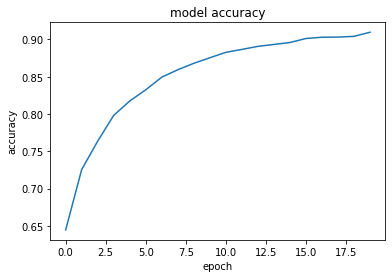

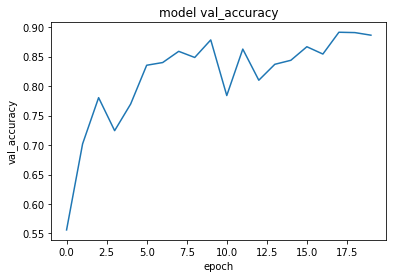

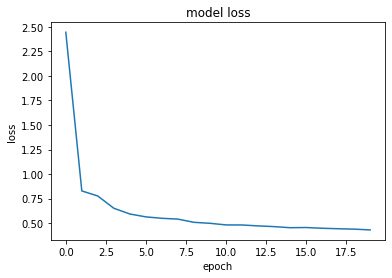

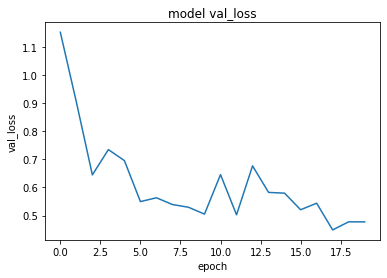

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


plt.plot(history.history['val_accuracy'])
plt.title('model val_accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()


plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


plt.plot(history.history['val_loss'])
plt.title('model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
!mkdir ./data/
!mv ./test ./data

In [ ]:
test_data_generator = ImageDataGenerator(rescale=1./255.)
test_generator = test_data_generator.flow_from_directory(directory='./data',
            batch_size=b_size,
            shuffle=False,color_mode='rgb',
            target_size=(64,64),
            class_mode='categorical')

Found 12500 images belonging to 1 classes.


In [ ]:
prediction = cnn.predict(test_generator)

In [ ]:
classes = ['cat', 'dog']
print(prediction)

[[7.6783133e-01 2.3216872e-01]
 [9.8609549e-01 1.3904497e-02]
 [8.3802599e-01 1.6197400e-01]
 ...
 [6.9866348e-03 9.9301344e-01]
 [9.9906641e-01 9.3366479e-04]
 [5.9051651e-01 4.0948355e-01]]


In [ ]:

prediction = np.argmax(prediction, axis = 1)
submission = pd.DataFrame(columns=['id', 'label'], dtype=str)
submission['label'] = [str(i) for i in prediction]
submission['id'] = [ (''.join(filter(str.isdigit, name ))) for name in test_generator.filenames]

submission.sort_values(by=['id'])


,id,label
0,1,0
1,10,0
2,100,0
3,1000,1
4,10000,1
...,...,...
12495,9995,0
12496,9996,1
12497,9997,1
12498,9998,0


In [ ]:
# test = []                                     # create empty folder name as test
# num_id = []                                   # create empty folder name as id number

# # os.listdir returns the list of files in the folder, in this case image class names
# for i in os.listdir('./data/test'):                             
    
#     test_class = i.split(".", 1)
    
#     for j in test_class[0:1]:
        
#         test.append(i)                         # append image file into the new folder train
        
#         num_id.append(j)                         # append the name of folder as the label of the image file
        
#   # create data frame from dictionary with 2 coloums Image and Labels
# submission_df = pd.DataFrame({'Id': num_id, 'Image': test})

In [ ]:
# img_id = []
# prediction = []

# from keras.preprocessing import image
# for i in range(0, submission_df.shape[0]):  
   
#     path = submission_df['Image'][i]

#     img = image.load_img(path, target_size=(64, 64))
    
#   # converting image to array
#     img = np.asarray(img, dtype= np.float32)
    
#   # normalizing the image
#     img = img /255
    
#   # reshaping the image in to a 4D array
#     img = img.reshape(-1,64,64,3)
    
#     result_predict = cnn.predict(img)[0]
        
#     prediction.append("%.2f"%result_predict)
    
#     i_id = path.split(".", 1)
    
#     img_id.append(i_id)

In [ ]:
# submission = pd.DataFrame({'id': num_id, 'label': prediction})

In [ ]:
%rm -rf ./train
%rm -rf ./data

In [ ]:
submission.to_csv('my_submission.csv', index=False)